In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.animation as animation
import joblib
from scipy.signal import butter, lfilter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, BatchNormalization
import tkinter as tk
import numpy as np
import time


In [2]:

# Load all user datasets
file_paths = ["user_a.csv", "user_b.csv", "user_c.csv", "user_d.csv"]
dataframes = [pd.read_csv(f) for f in file_paths]

# Merge all datasets
df = pd.concat(dataframes, ignore_index=True)

In [3]:
df

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1.0,3569.164550,2063.892754,1.673726,4.444736,0.526209,3.002088,1.425022,3.302739,3563.803888,...,45.468326,72.508750,3701.186330,2182.676835,18.192418,41.349662,16.004756,42.046467,46.280843,73.565719
1,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,...,36.551948,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041
2,1.0,3568.157929,2062.445859,2.798014,2.574504,1.120537,1.958819,0.982433,2.258622,3563.279981,...,40.754308,66.816547,3724.417296,2176.823208,18.159202,23.612639,14.378291,19.555084,43.210004,67.781924
3,1.0,3567.710021,2062.112673,2.181775,3.610507,0.629608,2.155876,0.856275,2.233711,3562.787801,...,38.074628,63.915386,3725.822160,2177.089059,19.737616,29.484396,15.793034,25.713513,39.250246,65.031031
4,1.0,3565.546124,2063.128867,1.685161,3.384311,0.677526,1.795798,0.927924,1.909810,3562.655091,...,35.357384,64.534645,3723.053978,2167.798335,8.429414,26.374975,14.920736,35.675266,33.901687,66.956313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,0.0,3572.183440,2063.784708,1.229472,2.118878,0.554802,1.531674,1.515939,2.064786,3564.057879,...,1.347489,1.589724,3568.988084,2063.376781,0.731822,1.842909,0.271320,1.235039,1.081958,2.239726
11516,0.0,3571.739312,2062.870495,1.131872,2.143829,0.600867,2.161191,1.481767,1.981241,3564.245318,...,1.269081,1.474497,3569.102041,2063.103722,0.914127,2.014998,0.249743,1.573777,1.254084,2.494333
11517,0.0,3571.184751,2063.216128,1.139433,2.066175,0.613243,2.005979,1.202326,1.918536,3564.496395,...,1.233228,1.539265,3569.136435,2063.114849,0.982602,2.111638,0.943919,1.525629,1.244487,2.555489
11518,0.0,3570.595817,2062.900476,1.013536,1.579048,0.214779,1.701602,1.314499,1.782709,3564.497194,...,1.138962,1.475072,3567.959877,2062.375466,1.036738,2.004392,1.395303,1.550127,1.095299,2.372722


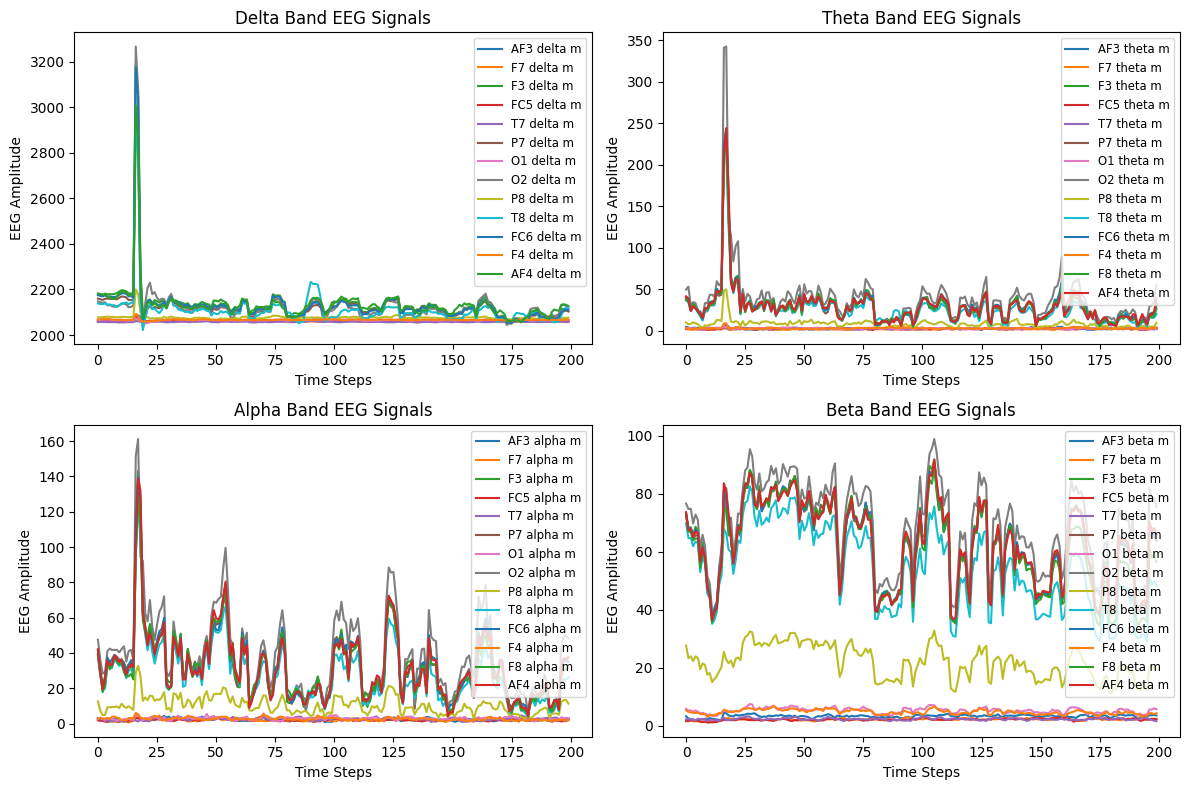

In [4]:


# Define frequency bands
freq_bands = {
    "Delta": [col for col in df.columns if "delta m" in col],
    "Theta": [col for col in df.columns if "theta m" in col],
    "Alpha": [col for col in df.columns if "alpha m" in col],
    "Beta": [col for col in df.columns if "beta m" in col],
}

# Plot EEG signals grouped by frequency bands
plt.figure(figsize=(12, 8))
for i, (band, channels) in enumerate(freq_bands.items(), 1):
    plt.subplot(2, 2, i)
    for channel in channels:
        plt.plot(df[channel][:200], label=channel)  # First 200 samples for visibility
    plt.title(f"{band} Band EEG Signals")
    plt.xlabel("Time Steps")
    plt.ylabel("EEG Amplitude")
    plt.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()


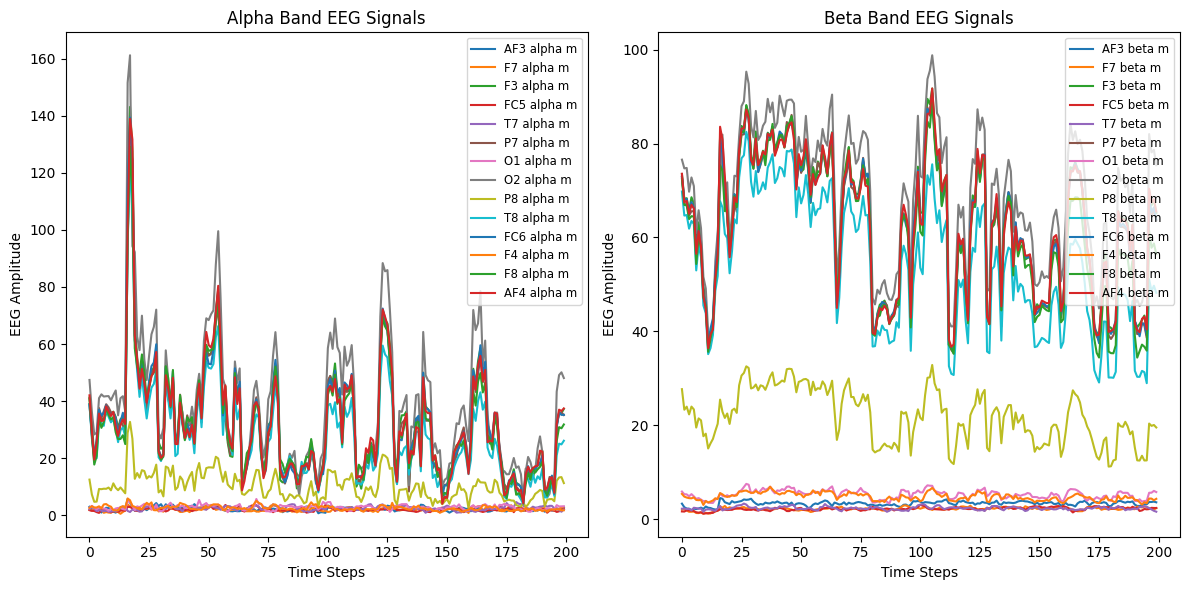

In [5]:
# Define relevant frequency bands for motor imagery
rev_freq_bands = {
    "Alpha": [col for col in df.columns if "alpha m" in col],
    "Beta": [col for col in df.columns if "beta m" in col],
}

# Plot EEG signals grouped by Alpha and Beta bands
plt.figure(figsize=(12, 6))
for i, (band, channels) in enumerate(rev_freq_bands.items(), 1):
    plt.subplot(1, 2, i)
    for channel in channels:
        plt.plot(df[channel][:200], label=channel)  # First 200 samples for visibility
    plt.title(f"{band} Band EEG Signals")
    plt.xlabel("Time Steps")
    plt.ylabel("EEG Amplitude")
    plt.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()

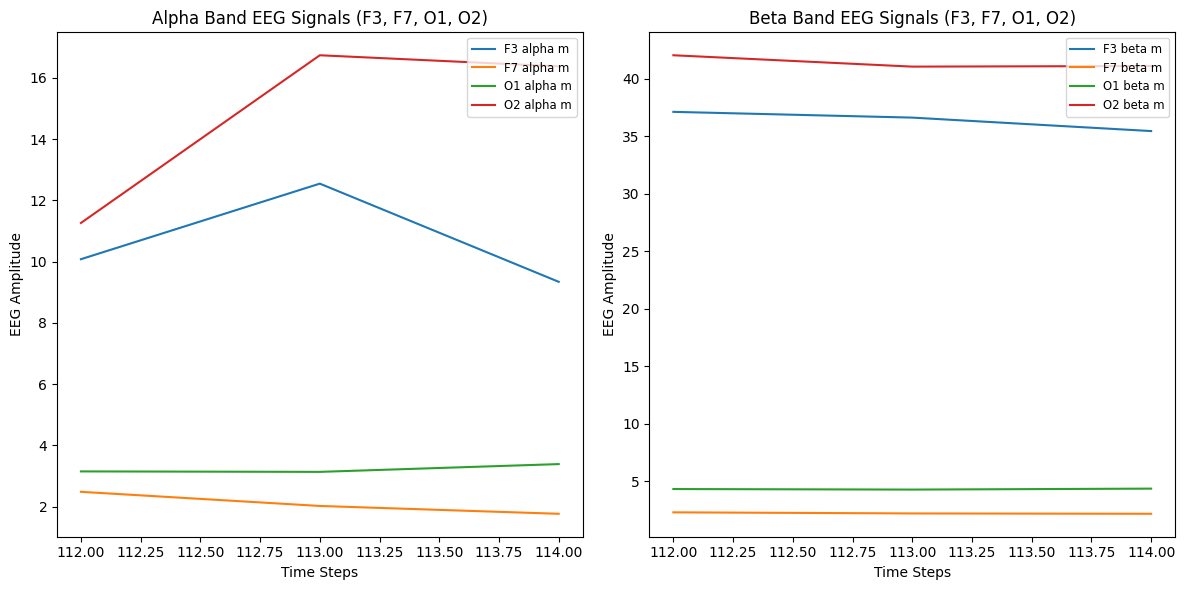

In [6]:
# Define relevant frequency bands for motor imagery with specific channels
selected_channels = ["F3 alpha m", "F3 beta m", "F7 alpha m", "F7 beta m", "O1 alpha m", "O1 beta m", "O2 alpha m", "O2 beta m"]


from scipy.stats import zscore
df[selected_channels] = df[selected_channels][(np.abs(zscore(df[selected_channels])) < 3).all(axis=1)]

freq_bandss = {
    "Alpha": [col for col in selected_channels if "alpha" in col],
    "Beta": [col for col in selected_channels if "beta" in col],
}

# Plot EEG signals grouped by Alpha and Beta bands for selected channels
plt.figure(figsize=(12, 6))
for i, (band, channels) in enumerate(freq_bandss.items(), 1):
    plt.subplot(1, 2, i)
    for channel in channels:
        if channel in df.columns:
            plt.plot(df[channel][:200], label=channel)  # First 200 samples for visibility
    plt.title(f"{band} Band EEG Signals (F3, F7, O1, O2)")
    plt.xlabel("Time Steps")
    plt.ylabel("EEG Amplitude")
    plt.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()

In [7]:
# Summary Statistics
descriptive_stats = df[selected_channels].describe()
descriptive_stats

,F3 alpha m,F3 beta m,F7 alpha m,F7 beta m,O1 alpha m,O1 beta m,O2 alpha m,O2 beta m
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,7.655134,11.329198,2.108004,2.387901,2.533611,2.753380,2.395483,3.390376
std,8.161806,15.076050,0.590688,0.532653,1.169957,1.504603,2.715337,5.284155
min,0.394220,0.600907,0.600544,0.974157,0.431699,0.699332,0.204650,0.457363
25%,2.276477,2.304810,1.686290,2.011350,1.693855,1.727207,1.015529,1.063540
50%,3.650911,3.210776,2.074767,2.268609,2.333100,2.207839,1.524274,1.411713
75%,10.791090,11.294374,2.498886,2.703773,3.121602,3.201943,2.510875,2.898945
max,42.441502,66.350720,3.917033,4.002838,7.244307,7.932720,26.114220,42.763862


In [8]:
# Correlation Matrix
correlation_matrix = df[selected_channels].corr()
correlation_matrix

,F3 alpha m,F3 beta m,F7 alpha m,F7 beta m,O1 alpha m,O1 beta m,O2 alpha m,O2 beta m
F3 alpha m,1.000000,0.797821,0.082022,0.190473,0.469749,0.722622,0.646370,0.562814
F3 beta m,0.797821,1.000000,0.061503,-0.045356,0.251633,0.912581,0.781203,0.823401
F7 alpha m,0.082022,0.061503,1.000000,0.067866,0.089851,0.076637,0.035211,0.029165
F7 beta m,0.190473,-0.045356,0.067866,1.000000,0.384051,-0.060196,-0.102937,-0.115304
O1 alpha m,0.469749,0.251633,0.089851,0.384051,1.000000,0.374489,0.148700,0.121487
O1 beta m,0.722622,0.912581,0.076637,-0.060196,0.374489,1.000000,0.656886,0.682919
O2 alpha m,0.646370,0.781203,0.035211,-0.102937,0.148700,0.656886,1.000000,0.879719
O2 beta m,0.562814,0.823401,0.029165,-0.115304,0.121487,0.682919,0.879719,1.000000


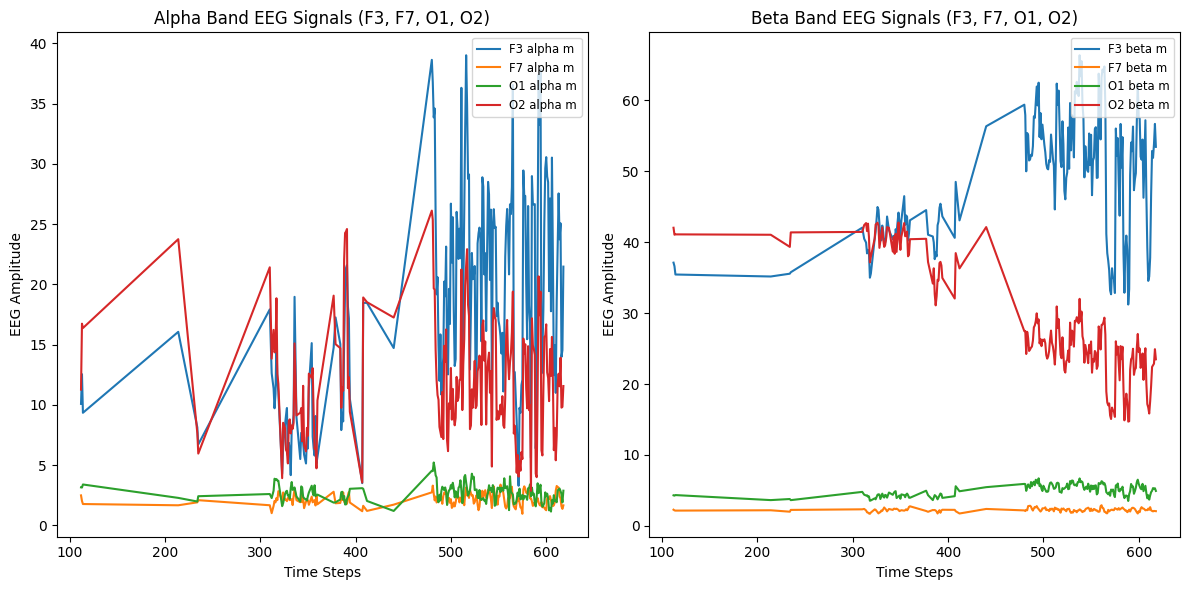

In [9]:
# Plot EEG signals grouped by Alpha and Beta bands for selected channels
plt.figure(figsize=(12, 6))
for i, (band, channels) in enumerate(freq_bandss.items(), 1):
    plt.subplot(1, 2, i)
    for channel in channels:
        if channel in df.columns:
            plt.plot(df[channel].dropna()[:200], label=channel)  # First 200 samples for visibility
    plt.title(f"{band} Band EEG Signals (F3, F7, O1, O2)")
    plt.xlabel("Time Steps")
    plt.ylabel("EEG Amplitude")
    plt.legend(loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()

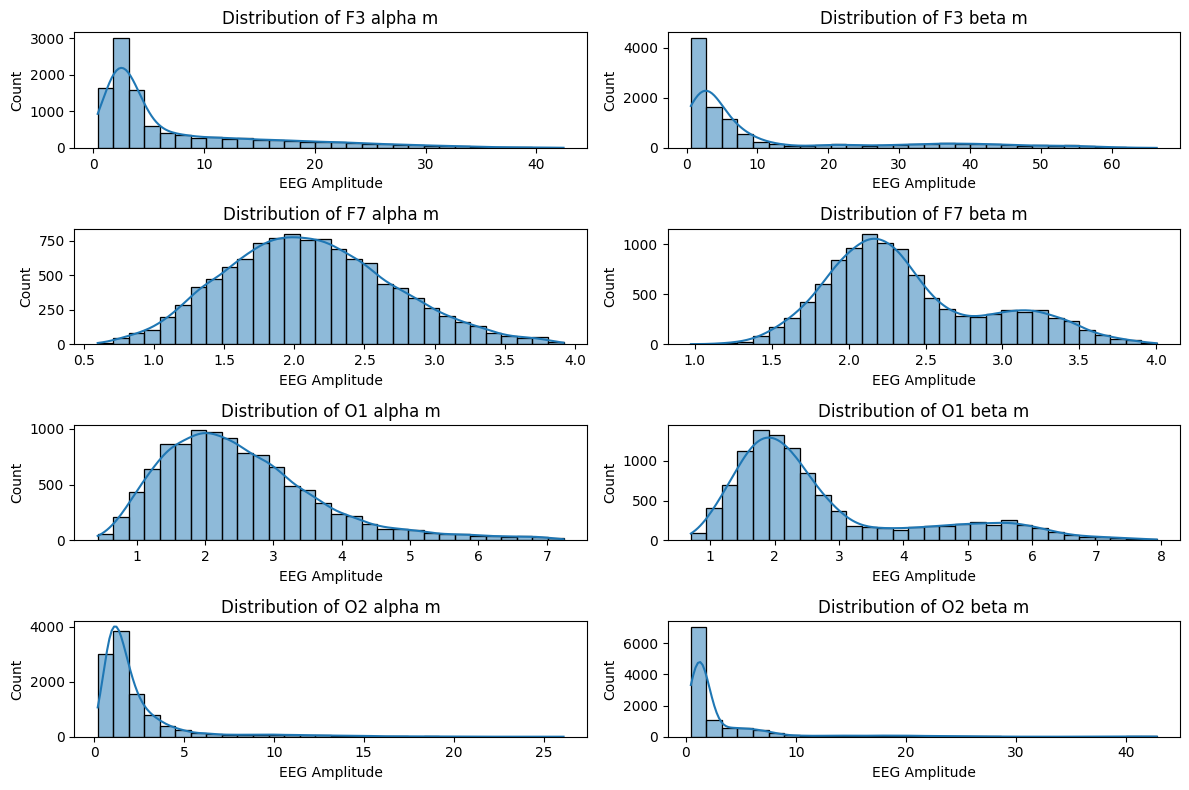

In [10]:
# Distribution Plots
plt.figure(figsize=(12, 8))
for i, channel in enumerate(selected_channels, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[channel].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {channel}")
    plt.xlabel("EEG Amplitude")

plt.tight_layout()
plt.show()

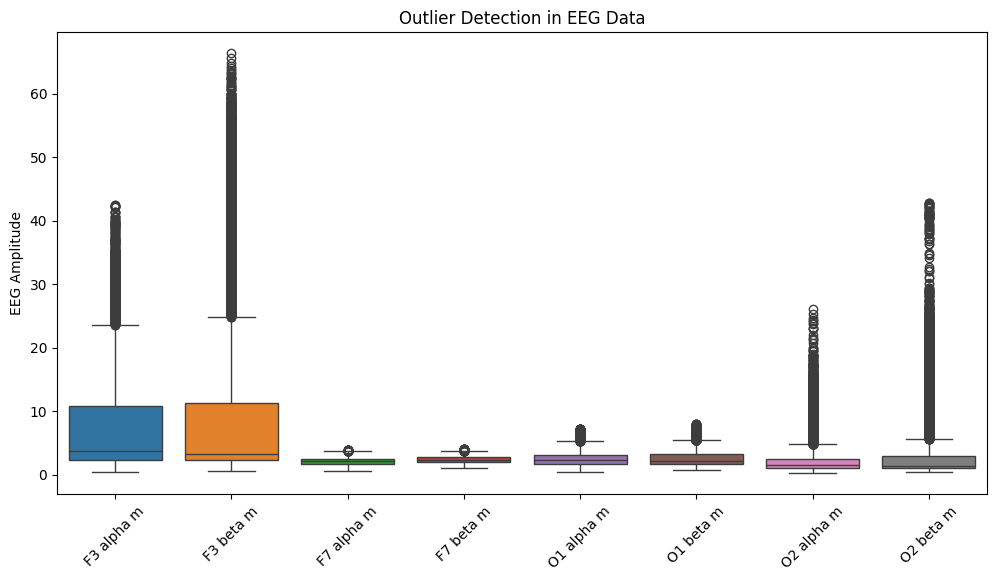

In [11]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_channels].dropna())
plt.xticks(rotation=45)
plt.title("Outlier Detection in EEG Data")
plt.ylabel("EEG Amplitude")
plt.show()

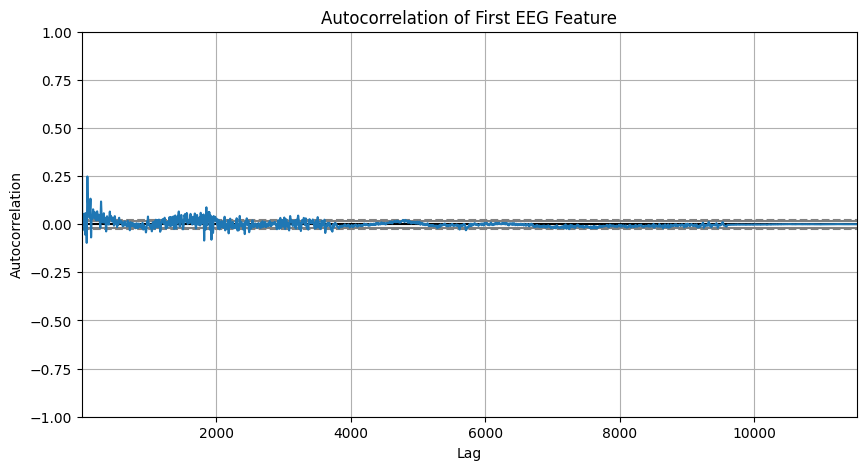

In [12]:
# Autocorrelation visualization
plt.figure(figsize=(10, 5))
pd.plotting.autocorrelation_plot(df.iloc[:, 1])  # Autocorrelation of the first feature
plt.title("Autocorrelation of First EEG Feature")
plt.show()

In [13]:
df[selected_channels] = df[selected_channels].dropna()
df[selected_channels].tail()

,F3 alpha m,F3 beta m,F7 alpha m,F7 beta m,O1 alpha m,O1 beta m,O2 alpha m,O2 beta m
11515,2.345265,2.196070,1.559730,2.066206,2.391342,1.863082,0.986282,1.495188
11516,2.469674,1.634685,2.000068,1.935716,3.236515,1.829062,0.956364,1.484612
11517,2.510404,1.785459,1.870462,2.312787,3.039385,2.240065,1.229676,1.289642
11518,2.376768,2.008604,2.036370,2.528563,2.515593,2.407612,1.565849,1.063021
11519,1.850912,1.835657,1.241223,2.479609,2.422707,2.308749,2.178763,1.414242


In [14]:
# Extract features and labels
X = df.drop(columns=['Class']+selected_channels).values  # EEG features
y = df['Class'].values  # Target labels

In [15]:
# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [16]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Reshape for CNN-LSTM model (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [19]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])), # Change kernel_size to 1
    BatchNormalization(),
    MaxPooling1D(pool_size=1), # Change pool_size to 1
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    LSTM(50),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3753 - loss: 1.0896 - val_accuracy: 0.4384 - val_loss: 1.0543
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4505 - loss: 1.0435 - val_accuracy: 0.4592 - val_loss: 1.0297
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4766 - loss: 1.0143 - val_accuracy: 0.4748 - val_loss: 1.0052
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4984 - loss: 0.9871 - val_accuracy: 0.5052 - val_loss: 0.9713
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5251 - loss: 0.9514 - val_accuracy: 0.5204 - val_loss: 0.9507
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5236 - loss: 0.9484 - val_accuracy: 0.5299 - val_loss: 0.9335
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5497 - loss: 0.9144 - val_accuracy: 0.5595 - val_loss: 0.9104
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5617 - loss: 0.8992 - val_accuracy: 

In [23]:
# Evaluate model
eval_results = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {eval_results[1] * 100:.2f}%")



72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.6588
Test Accuracy: 70.92%


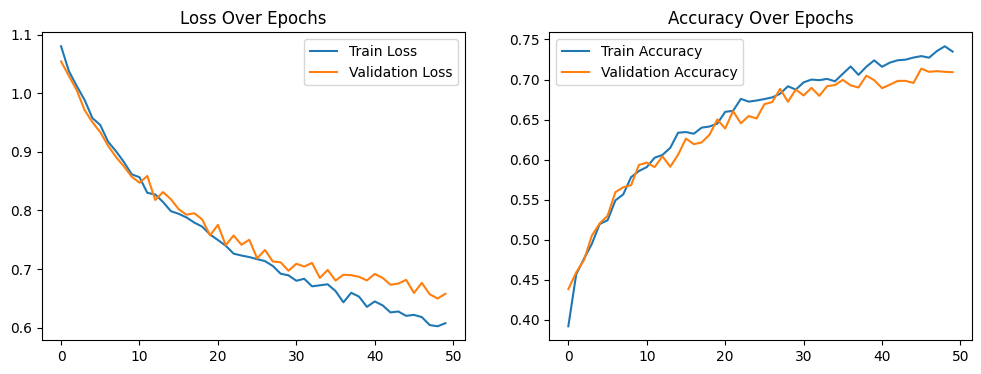

In [24]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


In [25]:
# Function to save the trained model
def save_model(model, model_path="model.pkl"):
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")

# Function to load the saved model
def load_model(model_path="model.pkl"):
    return joblib.load(model_path)

# Function to generate random unseen input
def generate_random_input(num_features=104):  # Set to 104 based on model's input shape
    return np.random.rand(1, 1, num_features)  # Shape (1, 1, num_features)

# Function to predict output using the trained model
def predict_output(model, input_data):
    probabilities = model.predict(input_data)  # Get softmax probabilities
    predicted_class = np.argmax(probabilities, axis=1)  # Get the class index (0, 1, or 2)
    return predicted_class


In [26]:
save_model(model)

Model saved to model.pkl


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Predicted class: 2


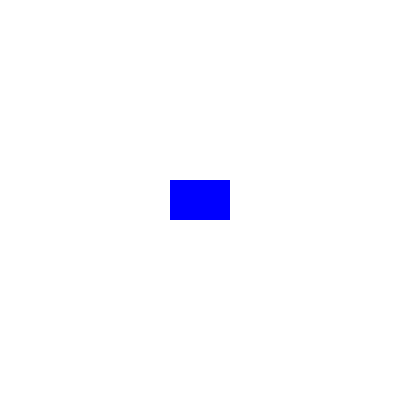

In [31]:
import pygame
import numpy as np
import time
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image

# Initialize Pygame
pygame.init()

# Screen settings
WIDTH, HEIGHT = 400, 400
WHITE = (255, 255, 255)
BLUE = (0, 0, 255)

# Car settings
car_width, car_height = 60, 40
car_x = WIDTH // 2 - car_width // 2
car_y = HEIGHT // 2 - car_height // 2
speed = 10
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Function to predict output using the trained model
def predict_output(model, input_data):
    probabilities = model.predict(input_data)  # Get softmax probabilities
    predicted_class = np.argmax(probabilities, axis=1)  # Get the class index (0, 1, or 2)
    return predicted_class[0]  # Return a single integer

# Function to animate car movement
def animate_car(prediction):
    global car_y

    screen = pygame.Surface((WIDTH, HEIGHT))  # Create a virtual screen for off-screen rendering
    frame_count = 0

    for _ in range(20):  # Number of animation frames
        screen.fill(WHITE)  # Clear screen
        pygame.draw.rect(screen, BLUE, (car_x, car_y, car_width, car_height))  # Draw car

        # Save each frame as an image
        frame_path = os.path.join(frames_dir, f"frame_{frame_count:03d}.png")
        pygame.image.save(screen, frame_path)
        frame_count += 1

        # Move car based on prediction
        if prediction == 1:  # Move forward (Up)
            car_y -= speed
        elif prediction == 2:  # Move backward (Down)

            car_y += speed

        time.sleep(0.05)  # Delay between frames

# Load model and make predictions
model = load_model()  # Load the saved model
input_sample = generate_random_input(104)  # Ensure correct input size
prediction = predict_output(model, input_sample)
print(f"Predicted class: {prediction}")

# Run animation
animate_car(prediction)

# Convert saved frames to animation
def display_animation():
    frames = sorted(glob.glob(os.path.join(frames_dir, "*.png")))  # Get all saved frames
    images = [Image.open(f) for f in frames]

    # Display as GIF inside the notebook
    images[0].save(
        "car_animation.gif",
        save_all=True,
        append_images=images[1:],
        duration=50,
        loop=0,
    )

    # Show animation in notebook
    from IPython.display import display
    display(images[0])

# Display animation
display_animation()
